In [1]:
# load the packages needed
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from src.solver import Solver
from src.model import AR, MA
import src.data_processor as dp
import src.inference as inf
from src.ts_gen import ar1_gen
data = np.loadtxt("../data/GOOG.csv", delimiter=',')

In [2]:
X = np.array([data[0:100]])
Y = dp.get_return(X)

In [3]:
lag = 5
sigma = 1.0
intercept = 0.1
phi = np.random.randn(5, 1)
AR_model = AR(lag=lag, phi=phi, sigma=sigma, intercept=intercept)
AR_model.params

{'intercept': 0.1, 'phi': array([[ 0.04556911],
        [ 0.05362628],
        [-0.78219674],
        [ 1.30158266],
        [ 0.46661286]]), 'sigma': 1.0}

In [4]:
_, grads = AR_model.loss(Y)
solver = Solver(AR_model, Y,
                          update_rule='sgd_momentum',
                          optim_config={
                            'learning_rate': 1e-6,
                          },
                          
                          num_epochs=1000, batch_size=1,
                          print_every=10)
solver.train()

1000
the loss is 86.566177
the loss is 85.883655
the loss is 85.059431
the loss is 84.174557
the loss is 83.256773
the loss is 82.315270
the loss is 81.352752
the loss is 80.369628
the loss is 79.365479
the loss is 78.339556
the loss is 77.290956
the loss is 76.218681
the loss is 75.121648
the loss is 73.998698
the loss is 72.848583
the loss is 71.669966
the loss is 70.461405
the loss is 69.221350
the loss is 67.948125
the loss is 66.639920
the loss is 65.294769
the loss is 63.910541
the loss is 62.484912
the loss is 61.015349
the loss is 59.499077
the loss is 57.933053
the loss is 56.313926
the loss is 54.637999
the loss is 52.901176
the loss is 51.098903
the loss is 49.226098
the loss is 47.277070
the loss is 45.245410
the loss is 43.123873
the loss is 40.904224
the loss is 38.577049
the loss is 36.131520
the loss is 33.555101
the loss is 30.833167
the loss is 27.948518
the loss is 24.880739
the loss is 21.605353
the loss is 18.092672
the loss is 14.306216
the loss is 10.200487
the l

In [5]:
AR_model.params

{'intercept': array([ 0.00019994]), 'phi': array([[ 0.04560256],
        [ 0.0535601 ],
        [-0.78190871],
        [ 1.30062633],
        [ 0.46616754]]), 'sigma': array([ 0.01331589])}

In [7]:
a, b = inf.yule_walker(Y, order =5,method='unbiased')
print a
print b

[ 0.06259647 -0.01382356 -0.13006426  0.02377511 -0.03743078]
0.000174892456335


In [31]:
rt = AR_model.predict(Y,20)
print rt
pred_price = dp.get_price(X[0,99],rt)
print pred_price
print data[100:120]

import src.trading as tr
tr.signal_generation(pred_price,5)

[[ 0.01299773  0.00986871 -0.0304475   0.00070504  0.01433177  0.04359306
  -0.03259612 -0.02343446 -0.01773143  0.08700267 -0.0005323  -0.02697482
  -0.10307319  0.09936313  0.06016789  0.05352717 -0.21846387  0.02724348
   0.07246382  0.27344961]]
[[ 546.80604415  552.20231518  535.38913338  535.76660273  543.44508591
   567.13552209  548.64910608  535.79181209  526.29145508  572.08021824
   571.77569945  556.35215212  499.00716197  548.59007393  581.59758186
   612.72885495  478.8697401   491.91581763  527.56191555  671.8235145 ]]
[ 539.78  532.11  533.99  539.18  540.31  536.7   533.33  526.83  526.69
  536.69  534.61  532.33  527.2   528.15  529.26  536.73  536.69  538.19
  540.48  537.84]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  1.,
         0., -1.,  0.,  1.,  0.,  0., -1.]])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


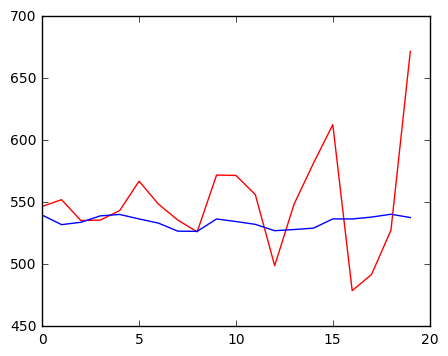

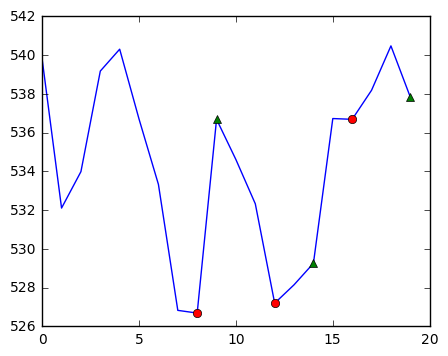

In [37]:

import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import src.trading as tr
signal=tr.signal_generation(pred_price,5)

plt.plot(pred_price[0,:],'r')
plt.plot(data[100:120],'b')
plt.hold(True)

plt.show()

plt.figure()
plt.plot(data[100:120],'b')
for i in range(20):
    if signal[0,i]==1:
        plt.plot(i,data[100+i], 'ro')
    if signal[0,i]==-1:
        plt.plot(i,data[100+i], 'g^')


In [38]:
import src.trading as tr
profit = tr.trade(X,np.array([data[100:120]]),AR_model,20,5,100)
print profit

[[ 100.          100.          100.          100.          100.          100.
   100.          100.          100.          101.89865006  101.89865006
   101.89865006  101.89865006  102.08226864  102.29681246  102.29681246
   102.29681246  102.5827228   103.01921258  102.51601039]]


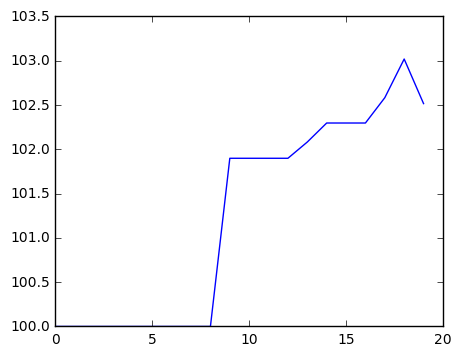

In [39]:
plt.plot(profit[0,:],'b')

#plt.hold(True)
#plt.show()